# Análise do Algoritmos

Os dataset forãm organizados os dados com as seguintes colunas:
- Tempo de Exeucução
- Método
- Epoca
- Tamanho do Vetor

- Quais forão os melhores resultados
- O que podemos concluir com os dados dos exemplos baseado na complexidade ciclomatica junto com outros testes?



## Configuração do ambiente

### Instalação dos Pacotes
Foram instalados os pacotes numpy para trabalhar com os vetores, pandas, tensorflow

In [2]:
%pip install tqdm
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib

  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.66.2-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 60.9/60.9 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.2/16.2 MB 4.6 MB/s eta 0:00:04
   - -------------------------------------- 0.5/16.2 MB 4.1 MB/s eta 0:00:04
   -- ------------------------------------- 1.1/16.2 MB 6.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.7/16.2 MB 8.4 MB/s eta 0:00:02
   ----- ---------------------------------- 2.4/16.2 MB 8.9 MB/s eta 0:00:02
   -------- ------------------------------- 3.4/16.2 MB 10.2 MB/s eta 0:00:02
   ---------- ----------------------------- 4.2/16.2 MB 10.7 MB/s eta 0:00:02
   ------------ --------------------------- 5.2/16.2 MB 11.5 MB/s eta 0:00:01
   --------------- ------------------------ 6.1/16.2 MB 12.2 MB/s eta 0:00:01
   ----------------- ---------------------- 7.1/16.2 MB 12.6 MB/s eta 0:00:01
   


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -------------------------------------- 165.5/165.5 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ------------------------------ --------- 225.3/294.9 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.4/8.0 MB 8.7 MB/s eta 0:00:01
   ------ --------------------------------- 1.2/8.0 MB 8.6 MB/s eta 0:00:01
   ---------- ----------------------------- 2.2/8.0 MB 11.5 MB/s eta 0:00:01
   --------------- ------------------------ 3.0/8.0 MB 11.4 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.0 MB 10.7 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.0 MB 9.2 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.0 MB 8.7 MB/s eta 0:00:01
   ---------


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importação dos Pacotes

In [1]:
import timeit
import random
import numpy as np
import pandas as pd
from tqdm import tqdm

# Algoritmos a serem testados
Para realizar a comparação de algoritmos de busca, foram realizado suas formas tradicionais (busca sequencial, otimizada e binaria).

## Tradicional
Busca Sequencial

In [2]:
def busca_sequencial(vetor:np.ndarray, chave:int, inicio:int, final:int)-> int:
  for index in range(inicio, final):
    if vetor[index] == chave:
      return index
  return -1

Busca Sequencial Otimizada

In [3]:
def busca_sequencial_otimizada(vetor:np.ndarray, chave:int, inicio:int, final:int)-> int:
  for index in range(inicio, final):
    if vetor[index] > chave:
      break
    if vetor[index] == chave:
      return index
  return -1

Busca Binaria

In [4]:
def busca_binaria(vetor:np.ndarray, chave:int, esquerda:int, direita:int) -> int:
  inicio:int = 0
  fim:int = len(vetor) - 1
  while inicio <= fim:
    meio:int = (inicio + fim) // 2
    if vetor[meio] == chave:
      return meio
    if vetor[meio] < chave:
      inicio:int = meio + 1
    if vetor[meio] > chave:
      fim:int = meio - 1
  return 0

# Coleta do Tempo Execução

Para esta coleta será criado uma função que a cada loop foi gerado 10000 vetores randomicos do tipo inteiro com os respectivos tamanhos $10^{4}$, $10^{5}$, $10^{6}$, $10^{7}$, em caso das busca otimizada e binaria os vetores foram gerados de forma ordernada.
Para mensurar o tempo executado será utilizado a ferramenta timeit.


### Tradicional

In [130]:
def benchmark():
  data_benchmark_epoch: pd.DataFrame = pd.DataFrame({})
  tamanho_dos_vetores: list[int]  = [10, 10**2, 10**3, 10**4,10**5,10**6,10**7]
  for tamanho in tamanho_dos_vetores:
    for i in tqdm(range(100)):
      vetor:np.ndarray = np.random.permutation(tamanho)
      chave:int =  vetor[random.randint(0, tamanho - 1)]
      vetor_ordenado:list = np.sort(vetor).tolist()
      item = pd.DataFrame({
          "epoca": [i],
          "tamanho do vetor": [tamanho],
          "chave": [chave],
          "SM": [timeit.timeit(lambda: np.sort(vetor).tolist(), number=1)],
          "BS": [timeit.timeit(lambda: busca_sequencial(vetor, chave, 0, len(vetor)), number=1)],
          "BSO":[timeit.timeit(lambda: busca_sequencial_otimizada(vetor_ordenado, chave, 0, len(vetor)),number=1)],
          "BB":[[timeit.timeit(lambda: busca_binaria(vetor_ordenado, chave, 0, len(vetor)), number=1)]]
      })

      data_benchmark_epoch = pd.concat([data_benchmark_epoch, item], ignore_index=True)

  return data_benchmark_epoch

## Execução dos códigos

Neste parte será salvo os dados em um dataframe para serem analisados, sendo analisado o tipo de algoritmo usado, a ténica e o tempo de execução

In [131]:
benchmark().to_csv('../data/dados_benchmark_dos_algoritmos_de_buscas.csv')

  8%|▊         | 8/100 [00:00<00:01, 74.12it/s]

100%|██████████| 100/100 [20:59<00:00, 12.59s/it]


# (Analise Exploratoria dos Dados)

In [136]:
import os
import pandas as pd

benchmark_files = [f for f in os.listdir('../data/') if f.endswith('.csv')]
benchmark_data:pd.DataFrame = pd.DataFrame({})
for f in benchmark_files:
  if 'data_' not in f:
    benchmark_data = pd.concat([benchmark_data,pd.read_csv("../data/"+f)], ignore_index=True)

In [137]:
benchmark_data.drop(columns=['Unnamed: 0'], inplace=True)

In [138]:
benchmark_data['BB'] = benchmark_data['BB'].apply(lambda x: float(x[1:len(x) - 1]))

In [139]:
benchmark_data

,epoca,tamanho do vetor,chave,SM,BS,BSO,BB
0,0,10,7,0.000081,0.000018,0.000015,0.000120
1,1,10,1,0.000038,0.000022,0.000022,0.000026
2,2,10,2,0.000042,0.000020,0.000014,0.000013
3,3,10,8,0.000089,0.000023,0.000018,0.000019
4,4,10,7,0.000024,0.000013,0.000024,0.000011
...,...,...,...,...,...,...,...
695,95,10000000,9058824,2.427753,3.277529,6.003945,0.000041
696,96,10000000,3391913,2.468955,3.677529,2.212191,0.000035
697,97,10000000,9521415,2.326918,3.220130,6.181132,0.000047
698,98,10000000,9695565,2.861617,3.418475,8.105662,0.000047


In [140]:
benchmark_data[benchmark_data['tamanho do vetor'] == 10000].describe()

,epoca,tamanho do vetor,chave,SM,BS,BSO,BB
count,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,10000.0,5146.830000,0.002720,0.002683,0.006025,0.000030
std,29.011492,0.0,2688.707493,0.006763,0.002647,0.009948,0.000020
min,0.000000,10000.0,76.000000,0.000821,0.000024,0.000043,0.000013
25%,24.750000,10000.0,2984.000000,0.001318,0.001005,0.001738,0.000022
50%,49.500000,10000.0,4971.000000,0.001643,0.001892,0.003220,0.000028
75%,74.250000,10000.0,7269.250000,0.002030,0.003555,0.005337,0.000032
max,99.000000,10000.0,9945.000000,0.062057,0.015505,0.047499,0.000201


In [125]:
len(benchmark_data['BB'].unique())

361

In [127]:
len(benchmark_data['BS'].unique())

671

In [128]:
len(benchmark_data['BSO'].unique())

655

In [12]:
# calcule o speedup do BB em relaçaõ ao BS e BSO
benchmark_data['speedup_bs/bb'] = (benchmark_data['BS']- benchmark_data['BB']) / benchmark_data['BS']
benchmark_data['speedup_bso/bb'] = (benchmark_data['BSO'] - benchmark_data['BB']) / benchmark_data['BSO']
benchmark_data['speedup_bs/bso'] = (benchmark_data['BS'] - benchmark_data['BSO']) / benchmark_data['BS']

In [13]:
benchmark_data.describe()

,epoca,tamanho do vetor,BS,BSO,BB,speedup_bs/bb,speedup_bso/bb,speedup_bs/bso
count,700.000000,7.000000e+02,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,49.500000,1.587301e+06,0.224523,0.161944,0.000102,0.272645,-5.429654,-1.284382
std,28.886711,3.453625e+06,0.554471,0.382014,0.002256,14.817022,162.366168,11.444616
min,0.000000,1.000000e+01,0.000007,0.000003,0.000003,-391.090622,-4295.075209,-207.665082
25%,24.750000,1.000000e+02,0.000047,0.000029,0.000010,0.774577,0.566917,-0.246860
50%,49.500000,1.000000e+04,0.001373,0.001194,0.000014,0.988909,0.988063,0.361655
75%,74.250000,1.000000e+06,0.065351,0.059340,0.000020,0.999745,0.999639,0.653675
max,99.000000,1.000000e+07,3.164025,2.007942,0.059715,0.999995,0.999992,0.998864


In [14]:
benchmark_data.groupby(['tamanho do vetor'])[['BB', 'BSO', 'BS']].describe()['BB']

,count,mean,std,min,25%,50%,75%,max
tamanho do vetor,,,,,,,,
10,100.0,0.000608,0.005970,0.000004,0.000007,0.000008,0.000012,0.059715
100,100.0,0.000012,0.000007,0.000003,0.000008,0.000010,0.000012,0.000041
1000,100.0,0.000016,0.000009,0.000006,0.000010,0.000014,0.000018,0.000053
10000,100.0,0.000019,0.000019,0.000007,0.000010,0.000016,0.000022,0.000141
100000,100.0,0.000019,0.000010,0.000009,0.000012,0.000015,0.000023,0.000058
1000000,100.0,0.000021,0.000011,0.000011,0.000014,0.000016,0.000027,0.000064
10000000,100.0,0.000021,0.000012,0.000013,0.000016,0.000017,0.000022,0.000117


In [15]:
benchmark_data.groupby(['tamanho do vetor'])[['BB', 'BSO', 'BS']].describe()['BS']

,count,mean,std,min,25%,50%,75%,max
tamanho do vetor,,,,,,,,
10,100.0,0.000026,0.000057,0.000007,0.000013,0.000015,0.000019,0.000538
100,100.0,0.000050,0.000071,0.000009,0.000028,0.000041,0.000049,0.000683
1000,100.0,0.000273,0.000225,0.000014,0.000112,0.000216,0.000371,0.001207
10000,100.0,0.001968,0.001702,0.000011,0.000832,0.001445,0.002701,0.009119
100000,100.0,0.023001,0.015897,0.000193,0.011957,0.020245,0.032665,0.070719
1000000,100.0,0.249892,0.276010,0.003527,0.073638,0.209609,0.291397,2.322074
10000000,100.0,1.296454,0.830251,0.004952,0.598832,1.217593,1.994623,3.164025


In [16]:
benchmark_data.groupby(['tamanho do vetor'])[['BB', 'BSO', 'BS']].describe()['BSO']

,count,mean,std,min,25%,50%,75%,max
tamanho do vetor,,,,,,,,
10,100.0,0.000011,0.000016,0.000004,0.000007,0.000009,0.000010,0.000161
100,100.0,0.000037,0.000156,0.000003,0.000011,0.000021,0.000029,0.001575
1000,100.0,0.000274,0.000814,0.000015,0.000076,0.000146,0.000266,0.008118
10000,100.0,0.001974,0.003169,0.000011,0.000561,0.001248,0.002180,0.028530
100000,100.0,0.015433,0.011728,0.000047,0.006258,0.014913,0.021110,0.063340
1000000,100.0,0.189742,0.230317,0.002352,0.058065,0.120380,0.217666,1.410244
10000000,100.0,0.926134,0.509539,0.033292,0.524178,0.958309,1.326404,2.007942


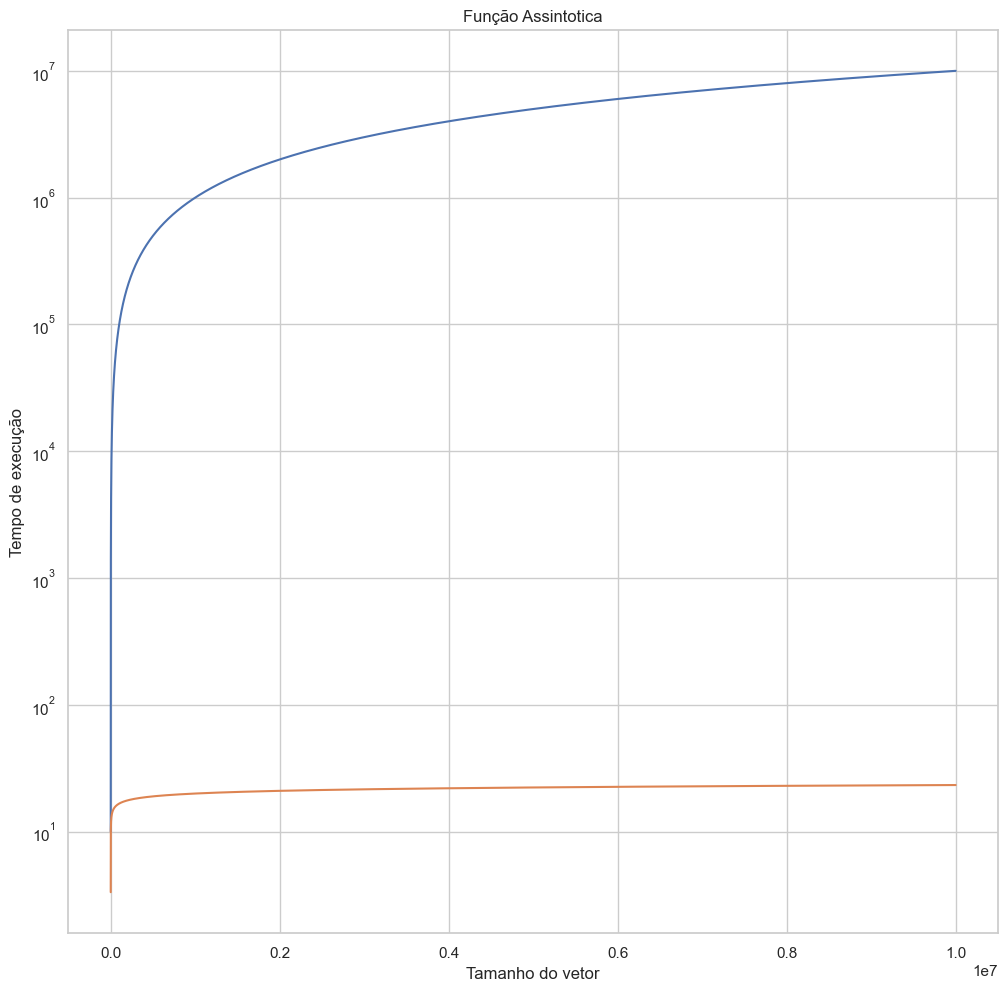

In [149]:
# plot os dados de BS, BSO e BB
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.lineplot(x=np.arange(10,10**7,10),y=np.arange(10,10**7,10), ax=ax)
sns.lineplot(x=np.arange(10,10**7+1,10),y=np.log2(np.arange(10,10**7+1,10)), ax=ax)
# space the plots
plt.tight_layout()
plt.setp(ax, title='Função Assintotica',xlabel='Tamanho do vetor', ylabel='Tempo de execução', yscale='log')
plt.show()

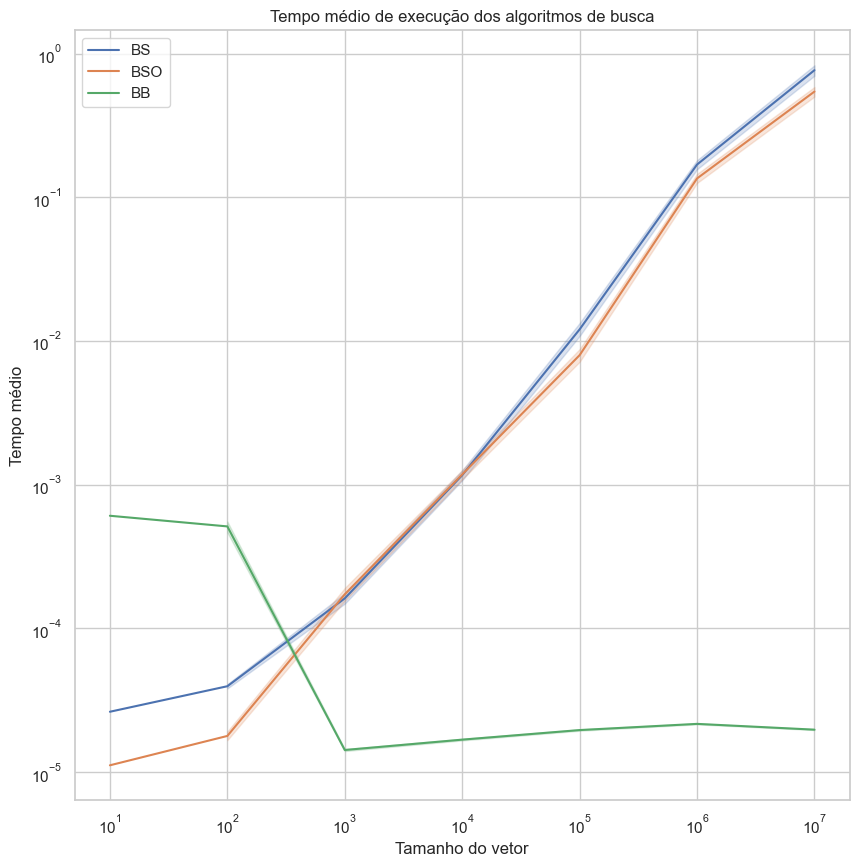

In [40]:
# plot data liner using rolling and mean bs bsos and bb in unique plot
benchmark_data['BS_mean'] = benchmark_data['BS'].rolling(window=100).mean()
benchmark_data['BSO_mean'] = benchmark_data['BSO'].rolling(window=100).mean()
benchmark_data['BB_mean'] = benchmark_data['BB'].rolling(window=100).mean()

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.lineplot(data=benchmark_data, x='tamanho do vetor', y='BS_mean', ax=ax, label='BS')
sns.lineplot(data=benchmark_data, x='tamanho do vetor', y='BSO_mean', ax=ax, label='BSO')
sns.lineplot(data=benchmark_data, x='tamanho do vetor', y='BB_mean', ax=ax, label='BB')
plt.setp(ax, xlabel='Tamanho do vetor', ylabel='Tempo médio',xticks=[10, 10**2, 10**3, 10**4,10**5,10**6,10**7],xticklabels=['10', '10^2', '10^3', '10^4','10^5','10^6','10^7'],title='Tempo médio de execução dos algoritmos de busca por tamanho do vetor',xscale='log', yscale='log')
plt.show()

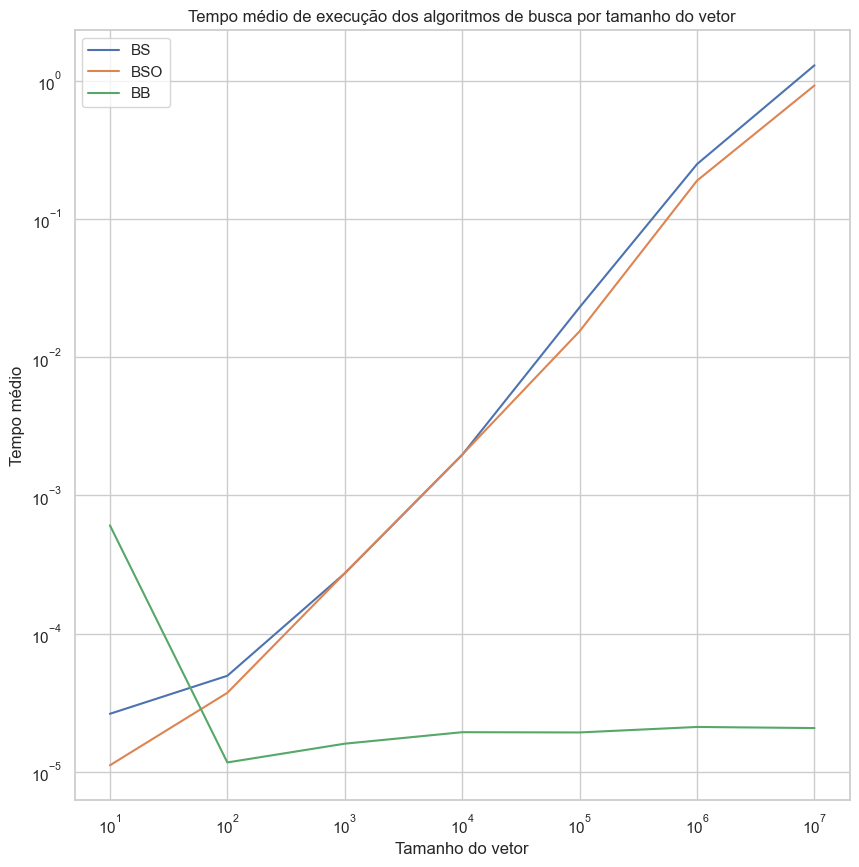

In [44]:
# plot data liner using group by in tamanho do vetor
benchmark_data_grouped = benchmark_data.groupby(['tamanho do vetor']).mean().reset_index()

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.lineplot(data=benchmark_data_grouped, x='tamanho do vetor', y='BS', ax=ax, label='BS')
sns.lineplot(data=benchmark_data_grouped, x='tamanho do vetor', y='BSO', ax=ax, label='BSO')
sns.lineplot(data=benchmark_data_grouped, x='tamanho do vetor', y='BB', ax=ax, label='BB')
plt.setp(ax, xlabel='Tamanho do vetor', ylabel='Tempo médio',xticks=[10, 10**2, 10**3, 10**4,10**5,10**6,10**7],xticklabels=['10', '10^2', '10^3', '10^4','10^5','10^6','10^7'],title='Tempo médio de execução dos algoritmos de busca por tamanho do vetor',xscale='log', yscale='log')
plt.show()

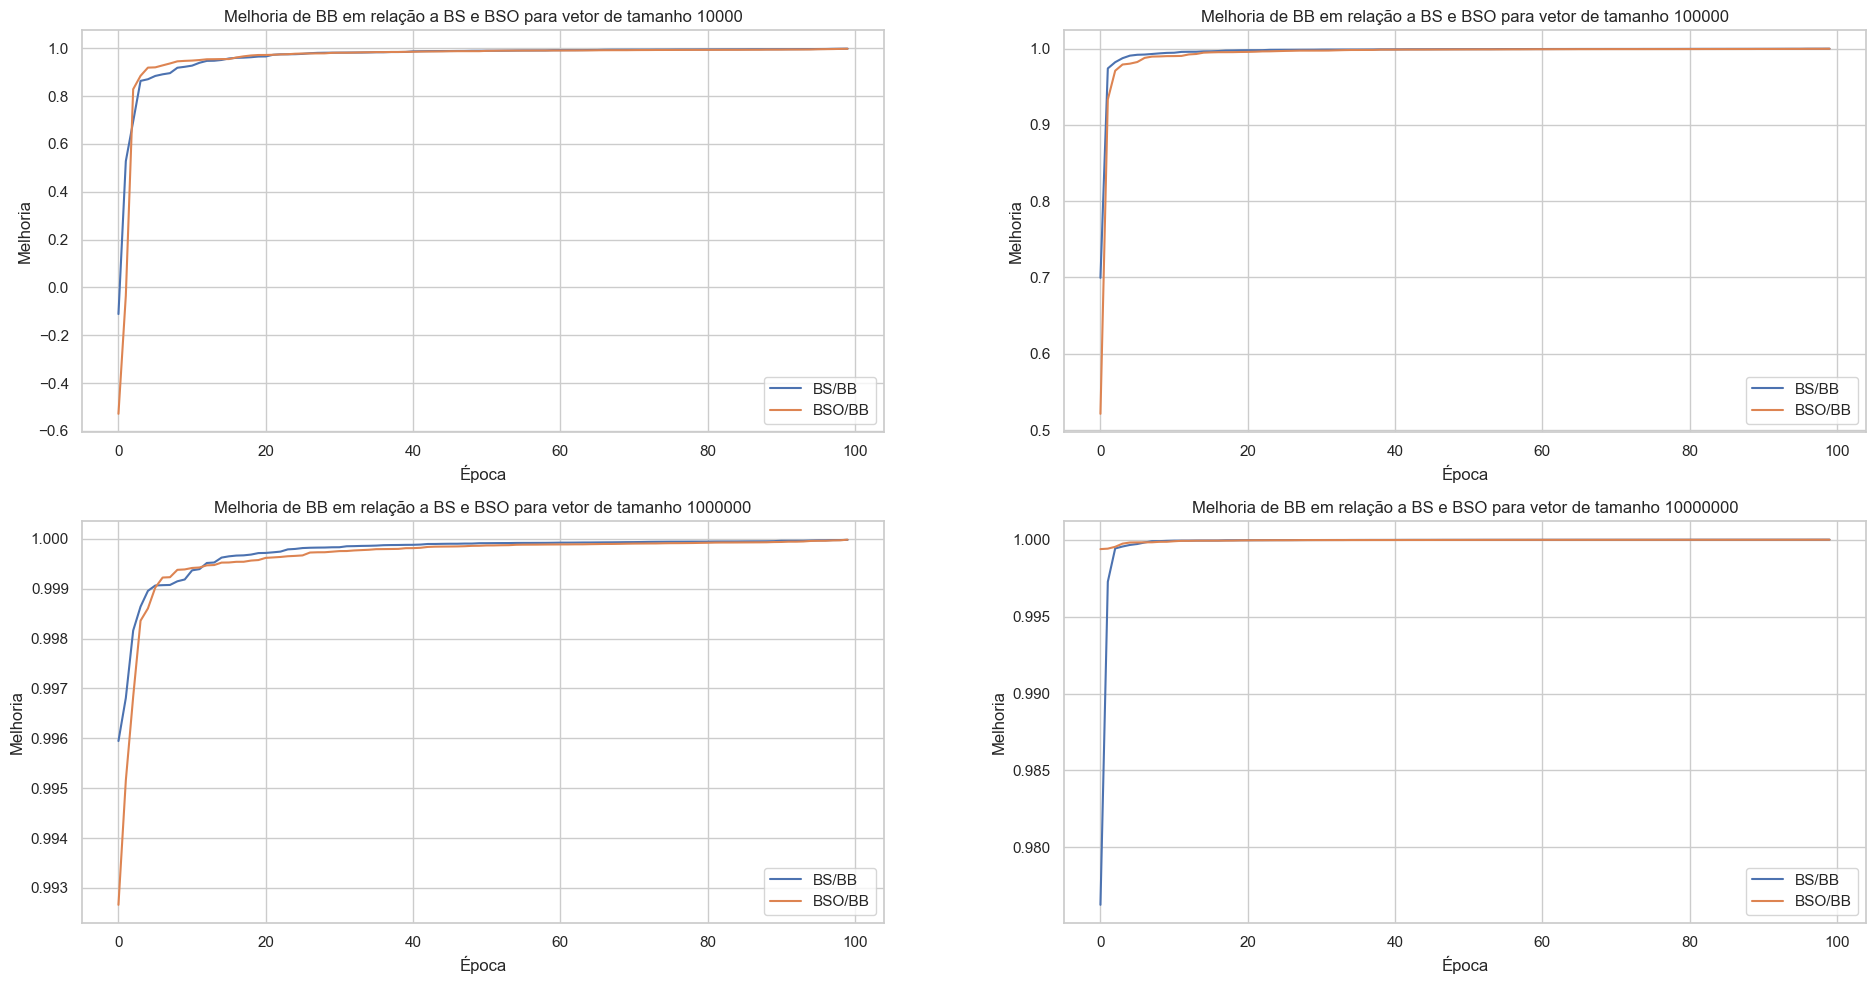

In [81]:
# plot data linear bs bsos and bb
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

n_data:pd.DataFrame = benchmark_data[benchmark_data['tamanho do vetor'] == 10000].sort_values(by=['speedup_bs/bb'], ignore_index=True)
n_data['epoca'] = n_data.index
sns.lineplot(data=n_data, x='epoca', y='speedup_bs/bb', ax=ax[0,0], label='BS/BB')
ax[0,0].set_title('Melhoria de BB em relação a BS e BSO para vetor de tamanho 10000')
ax[0,0].set_xlabel('Época')
ax[0,0].set_ylabel('Melhoria')
ax[0,0].legend()

n_data:pd.DataFrame = benchmark_data[benchmark_data['tamanho do vetor'] == 100000].sort_values(by=['speedup_bs/bb'], ignore_index=True)
n_data['epoca'] = n_data.index
sns.lineplot(data=n_data, x='epoca', y='speedup_bs/bb', ax=ax[0,1], label='BS/BB')
ax[0,1].set_title('Melhoria de BB em relação a BS e BSO para vetor de tamanho 100000')
ax[0,1].set_xlabel('Época')
ax[0,1].set_ylabel('Melhoria')
ax[0,1].legend()

n_data:pd.DataFrame = benchmark_data[benchmark_data['tamanho do vetor'] == 1000000].sort_values(by=['speedup_bs/bb'], ignore_index=True)
n_data['epoca'] = n_data.index
sns.lineplot(data=n_data, x='epoca', y='speedup_bs/bb', ax=ax[1,0], label='BS/BB')
ax[1,0].set_title('Melhoria de BB em relação a BS e BSO para vetor de tamanho 1000000')
ax[1,0].set_xlabel('Época')
ax[1,0].set_ylabel('Melhoria')
ax[1,0].legend()

n_data:pd.DataFrame = benchmark_data[benchmark_data['tamanho do vetor'] == 10000000].sort_values(by=['speedup_bs/bb'], ignore_index=True)
n_data['epoca'] = n_data.index
sns.lineplot(data=n_data, x='epoca', y='speedup_bs/bb', ax=ax[1,1], label='BS/BB')
ax[1,1].set_title('Melhoria de BB em relação a BS e BSO para vetor de tamanho 10000000')
ax[1,1].set_xlabel('Época')
ax[1,1].set_ylabel('Melhoria')
ax[1,1].legend()

n_data:pd.DataFrame = benchmark_data[benchmark_data['tamanho do vetor'] == 10000].sort_values(by=['speedup_bso/bb'], ignore_index=True)
n_data['epoca'] = n_data.index
sns.lineplot(data=n_data, x='epoca', y='speedup_bso/bb', ax=ax[0,0], label='BSO/BB')
ax[0,0].legend()
n_data:pd.DataFrame = benchmark_data[benchmark_data['tamanho do vetor'] == 100000].sort_values(by=['speedup_bso/bb'], ignore_index=True)
n_data['epoca'] = n_data.index
sns.lineplot(data=n_data, x='epoca', y='speedup_bso/bb', ax=ax[0,1], label='BSO/BB')
ax[0,1].legend()
n_data:pd.DataFrame = benchmark_data[benchmark_data['tamanho do vetor'] == 1000000].sort_values(by=['speedup_bso/bb'], ignore_index=True)
n_data['epoca'] = n_data.index
sns.lineplot(data=n_data, x='epoca', y='speedup_bso/bb', ax=ax[1,0], label='BSO/BB')
ax[1,0].legend()
n_data:pd.DataFrame = benchmark_data[benchmark_data['tamanho do vetor'] == 10000000].sort_values(by=['speedup_bso/bb'], ignore_index=True)
n_data['epoca'] = n_data.index
sns.lineplot(data=n_data, x='epoca', y='speedup_bso/bb', ax=ax[1,1], label='BSO/BB')
ax[1,1].legend()

fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(20)

plt.show()

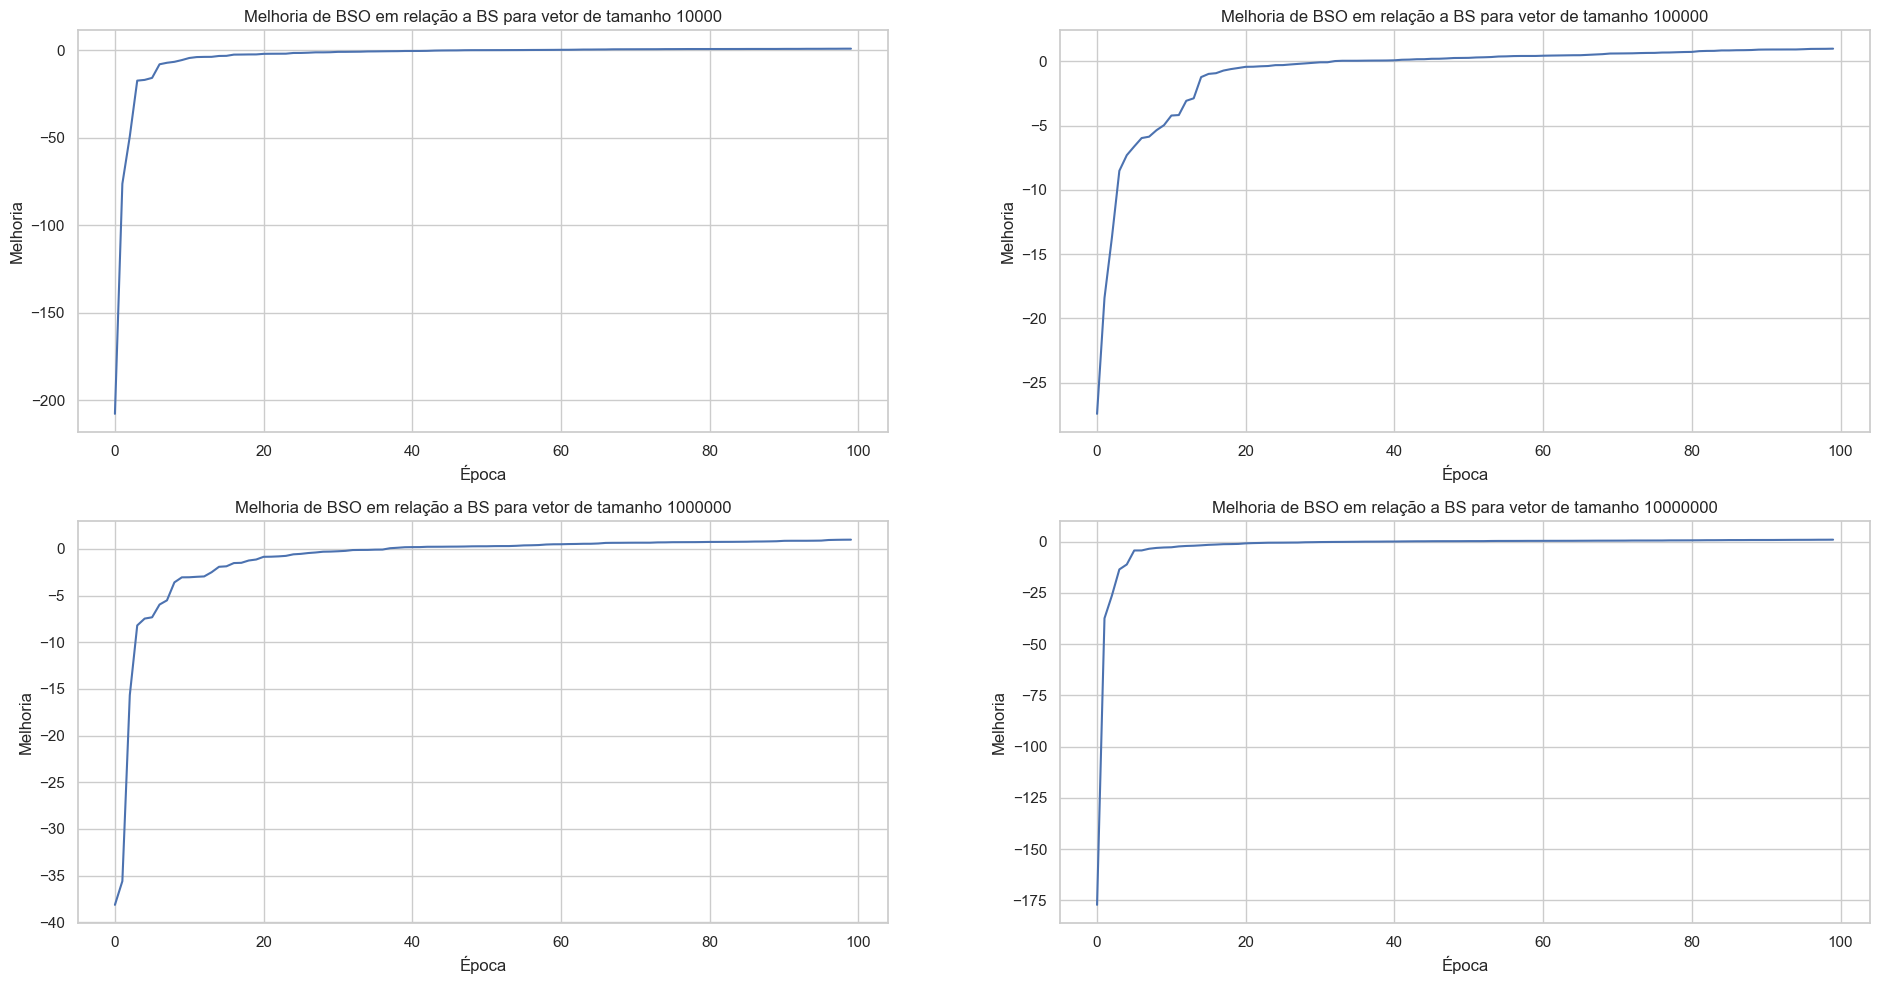

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
n_data:pd.DataFrame = benchmark_data[benchmark_data['tamanho do vetor'] == 10000].sort_values(by=['speedup_bs/bso'], ignore_index=True)
n_data['epoca'] = n_data.index
sns.lineplot(data=n_data, x='epoca', y='speedup_bs/bso', ax=ax[0,0])
ax[0,0].set_title('Melhoria de BSO em relação a BS para vetor de tamanho 10000')
ax[0,0].set_xlabel('Época')
ax[0,0].set_ylabel('Melhoria')
n_data:pd.DataFrame = benchmark_data[benchmark_data['tamanho do vetor'] == 100000].sort_values(by=['speedup_bs/bso'], ignore_index=True)
n_data['epoca'] = n_data.index
sns.lineplot(data=n_data, x='epoca', y='speedup_bs/bso', ax=ax[0,1])
ax[0,1].set_title('Melhoria de BSO em relação a BS para vetor de tamanho 100000')
ax[0,1].set_xlabel('Época')
ax[0,1].set_ylabel('Melhoria')
n_data:pd.DataFrame = benchmark_data[benchmark_data['tamanho do vetor'] == 1000000].sort_values(by=['speedup_bs/bso'], ignore_index=True)
n_data['epoca'] = n_data.index
sns.lineplot(data=n_data, x='epoca', y='speedup_bs/bso', ax=ax[1,0])
ax[1,0].set_title('Melhoria de BSO em relação a BS para vetor de tamanho 1000000')
ax[1,0].set_xlabel('Época')
ax[1,0].set_ylabel('Melhoria')
n_data:pd.DataFrame = benchmark_data[benchmark_data['tamanho do vetor'] == 10000000].sort_values(by=['speedup_bs/bso'], ignore_index=True)
n_data['epoca'] = n_data.index
sns.lineplot(data=n_data, x='epoca', y='speedup_bs/bso', ax=ax[1,1])
ax[1,1].set_title('Melhoria de BSO em relação a BS para vetor de tamanho 10000000')
ax[1,1].set_xlabel('Época')
ax[1,1].set_ylabel('Melhoria')

fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(20)

plt.show()